In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_path = "/content/drive/MyDrive/Genre Classification Dataset/train_data.txt"
train_data = pd.read_csv(train_path, sep=':::', names=['Title', 'Genre', 'Description'], engine='python')
train_data

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...
54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...
54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...


In [ ]:
test_path = "/content/drive/MyDrive/Genre Classification Dataset/test_data.txt"
test_data = pd.read_csv(test_path, sep=':::', names=['Id', 'Title', 'Description'], engine='python')
test_data

,Id,Title,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...
...,...,...,...
54195,54196,"""Tales of Light & Dark"" (2013)","Covering multiple genres, Tales of Light & Da..."
54196,54197,Der letzte Mohikaner (1965),As Alice and Cora Munro attempt to find their...
54197,54198,Oliver Twink (2007),A movie 169 years in the making. Oliver Twist...
54198,54199,Slipstream (1973),"Popular, but mysterious rock D.J Mike Mallard..."


In [ ]:
test_solution_path = "/content/drive/MyDrive/Genre Classification Dataset/test_data_solution.txt"
test_solution = pd.read_csv(test_solution_path, sep=':::', names=['Id', 'Genre'], engine='python')

In [ ]:
train_data.describe()

,Title,Genre,Description
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,13613,12


In [ ]:
test_data.describe()

,Id
count,54200.000000
mean,27100.500000
std,15646.336632
min,1.000000
25%,13550.750000
50%,27100.500000
75%,40650.250000
max,54200.000000


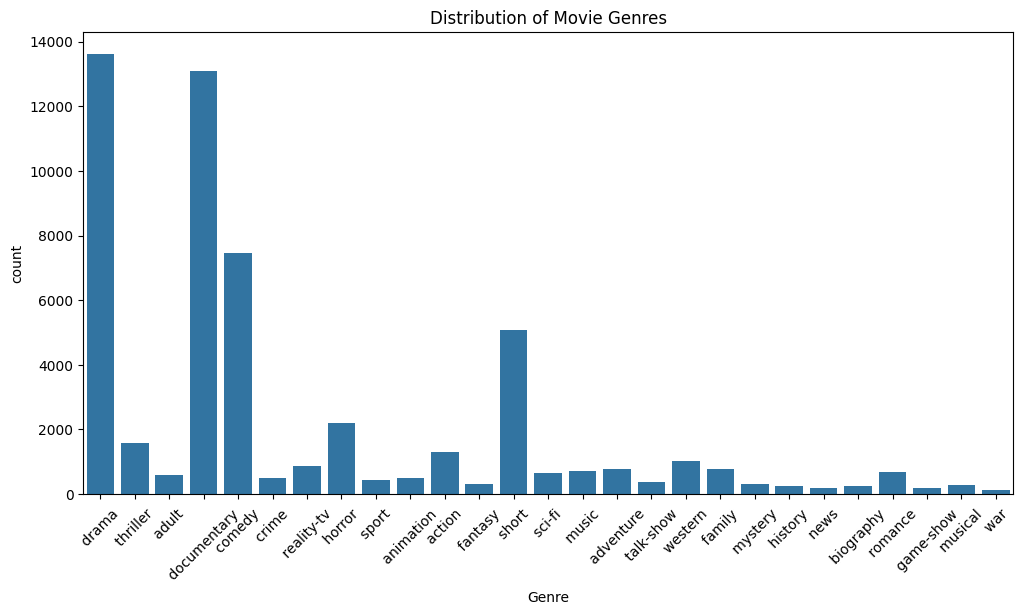

In [ ]:
# Check the distribution of genres in the training data
plt.figure(figsize=(12, 6))
sns.countplot(data=train_data, x='Genre')
plt.title('Distribution of Movie Genres')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Check for missing values
print(train_data.isnull().sum())
print(test_data.isnull().sum())


Title          0
Genre          0
Description    0
dtype: int64
Id             0
Title          0
Description    0
dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

In [ ]:
# Combine title and description for both training and test data
train_data['text'] = train_data['Title'] + ' ' + train_data['Description']
test_data['text'] = test_data['Title'] + ' ' + test_data['Description']

# Encode the labels (genres)
label_encoder = LabelEncoder()
train_data['Genre'] = label_encoder.fit_transform(train_data['Genre'])

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_data['text'], train_data['Genre'], test_size=0.2, random_state=42)

# Tokenize the text data
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_test_seq = tokenizer.texts_to_sequences(test_data['text'])

# Pad the sequences
max_length = 200
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post', truncating='post')
X_val_pad = pad_sequences(X_val_seq, maxlen=max_length, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post', truncating='post')


In [ ]:
# Define the model
model = Sequential([
    Embedding(input_dim=10000, output_dim=64, input_length=max_length),
    LSTM(64, return_sequences=True),
    Dropout(0.2),
    LSTM(32),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 64)           640000    
                                                                 
 lstm (LSTM)                 (None, 200, 64)           33024     
                                                                 
 dropout (Dropout)           (None, 200, 64)           0         
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 32)                1056      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 27)                8

In [ ]:
# Train the model
history = model.fit(X_train_pad, y_train, validation_data=(X_val_pad, y_val), epochs=10, batch_size=32)


Epoch 1/10
1356/1356 [==============================] - 319s 232ms/step - loss: 2.4091 - accuracy: 0.2457 - val_loss: 2.3460 - val_accuracy: 0.2487
Epoch 2/10
1356/1356 [==============================] - 314s 231ms/step - loss: 2.3608 - accuracy: 0.2476 - val_loss: 2.3421 - val_accuracy: 0.2499
Epoch 3/10
1356/1356 [==============================] - 319s 235ms/step - loss: 2.2192 - accuracy: 0.3387 - val_loss: 2.0024 - val_accuracy: 0.4319
Epoch 4/10
1356/1356 [==============================] - 317s 234ms/step - loss: 1.9680 - accuracy: 0.4439 - val_loss: 1.9421 - val_accuracy: 0.4366
Epoch 5/10
1356/1356 [==============================] - 316s 233ms/step - loss: 1.8189 - accuracy: 0.4728 - val_loss: 1.8448 - val_accuracy: 0.4617
Epoch 6/10
1356/1356 [==============================] - 312s 230ms/step - loss: 1.6691 - accuracy: 0.5048 - val_loss: 1.8129 - val_accuracy: 0.4690
Epoch 7/10
1356/1356 [==============================] - 316s 233ms/step - loss: 1.5591 - accuracy: 0.5358 - val_

In [ ]:
# Evaluate the model
val_loss, val_accuracy = model.evaluate(X_val_pad, y_val)
print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_accuracy}')


339/339 [==============================] - 18s 52ms/step - loss: 1.9975 - accuracy: 0.4770
Validation Loss: 1.9975156784057617
Validation Accuracy: 0.4769897758960724


In [ ]:
# Make predictions on the test set
test_predictions = model.predict(X_test_pad)
predicted_genres = label_encoder.inverse_transform(test_predictions.argmax(axis=1))

# Add the predicted genres to the test data
test_data['PREDICTED_GENRE'] = predicted_genres

# Display the first few rows of the test data with predictions
print(test_data[['Id', 'Title', 'Description', 'PREDICTED_GENRE']].head())


1694/1694 [==============================] - 91s 53ms/step
   Id                          Title  \
0   1          Edgar's Lunch (1998)    
1   2      La guerra de papá (1977)    
2   3   Off the Beaten Track (2010)    
3   4        Meu Amigo Hindu (2015)    
4   5             Er nu zhai (1955)    

                                         Description PREDICTED_GENRE  
0   L.R. Brane loves his life - his car, his apar...         comedy   
1   Spain, March 1964: Quico is a very naughty ch...          drama   
2   One year in the life of Albin and his family ...    documentary   
3   His father has died, he hasn't spoken with hi...          drama   
4   Before he was known internationally as a mart...          drama   


In [ ]:
test_data['Genre'] = test_solution['Genre']
accuracy = accuracy_score(test_data['Genre'], test_data['PREDICTED_GENRE'])
print(f'Test Accuracy: {accuracy}')

In [ ]:
test_data[['Id', 'Title', 'Description', 'PREDICTED_GENRE']].to_csv('test_predictions.csv', index=False)

In [ ]:
from google.colab import files
files.download('test_predictions.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>